In [2]:
#RNN MODEL

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU
from sklearn.model_selection import train_test_split

# Load your dataset (adjust file path as needed)
data = pd.read_csv('dataset.csv')  # Replace with your actual file

# Feature selection: Drop 'RUL' for input features
X = data.drop('RUL', axis=1).values
y = data['RUL'].values

# Normalize features (MinMax scaling between 0 and 1)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Reshape the data into time series format for RNN (samples, timesteps, features)
TIME_STEPS = 10  # Window size
def create_sequences(X, y, time_steps=TIME_STEPS):
    X_seq, y_seq = [], []
    for i in range(len(X) - time_steps):
        X_seq.append(X[i:i + time_steps])
        y_seq.append(y[i + time_steps])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X, y)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Define the RNN model
model_rnn = Sequential()
model_rnn.add(SimpleRNN(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model_rnn.add(Dense(32, activation='relu'))
model_rnn.add(Dense(1))  # Output layer for RUL prediction

# Compile the model
model_rnn.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model_rnn.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on test data
test_loss, test_mae = model_rnn.evaluate(X_test, y_test)
print(f'Test MAE: {test_mae}')

# Predict the RUL for test data
y_pred = model_rnn.predict(X_test)

# Example of comparing predicted vs actual values



Epoch 1/50


C:\Users\saravanan013\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


302/302 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 201913.1562 - mae: 314.0888 - val_loss: 6154.0977 - val_mae: 27.0993
Epoch 2/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9788.2207 - mae: 31.9814 - val_loss: 5695.3892 - val_mae: 25.8071
Epoch 3/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7695.5259 - mae: 30.4887 - val_loss: 5599.7324 - val_mae: 29.2834
Epoch 4/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6031.3833 - mae: 28.0657 - val_loss: 5806.1094 - val_mae: 33.9883
Epoch 5/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5316.8892 - mae: 24.5246 - val_loss: 5019.5957 - val_mae: 24.0705
Epoch 6/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5676.8696 - mae: 26.4962 - val_loss: 4738.9766 - val_mae: 21.1364
Epoch 7/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5656.3369 - mae: 26.7895 - val_loss: 4683.1118 - val_mae: 24.2576
Epoch 8/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5232.2383 - mae: 28.3359 - val_loss: 5261.0234 - val_mae: 40.0325


In [4]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Predict the RUL for the test data
y_pred = model_rnn.predict(X_test)

# Flatten the predictions and actual values
y_pred = y_pred.flatten()
y_test = y_test.flatten()

# Calculate standard performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error

# Define a custom accuracy metric (percentage of predictions within 10% tolerance of actual value)
tolerance = 0.10  # 10% tolerance
accurate_predictions = np.sum(np.abs(y_test - y_pred) <= tolerance * y_test)
accuracy = accurate_predictions / len(y_test) * 100

# Print all performance metrics
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'Accuracy (within 10% tolerance): {accuracy:.2f}%')

# Optional: Print the first 10 predictions vs actual values for inspection
print('\nSample Predictions vs Actual Values:')
for i in range(10):
    print(f'Actual: {y_test[i]:.2f}, Predicted: {y_pred[i]:.2f}')


95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Mean Squared Error (MSE): 1816.3876
Mean Absolute Error (MAE): 15.0048
Root Mean Squared Error (RMSE): 42.6191
Accuracy (within 10% tolerance): 91.27%

Sample Predictions vs Actual Values:
Actual: 192.00, Predicted: 207.31
Actual: 445.00, Predicted: 454.37
Actual: 349.00, Predicted: 355.04
Actual: 515.00, Predicted: 516.89
Actual: 827.00, Predicted: 813.48
Actual: 929.00, Predicted: 940.20
Actual: 1008.00, Predicted: 1025.62
Actual: 273.00, Predicted: 253.64
Actual: 74.00, Predicted: 90.84
Actual: 341.00, Predicted: 346.20


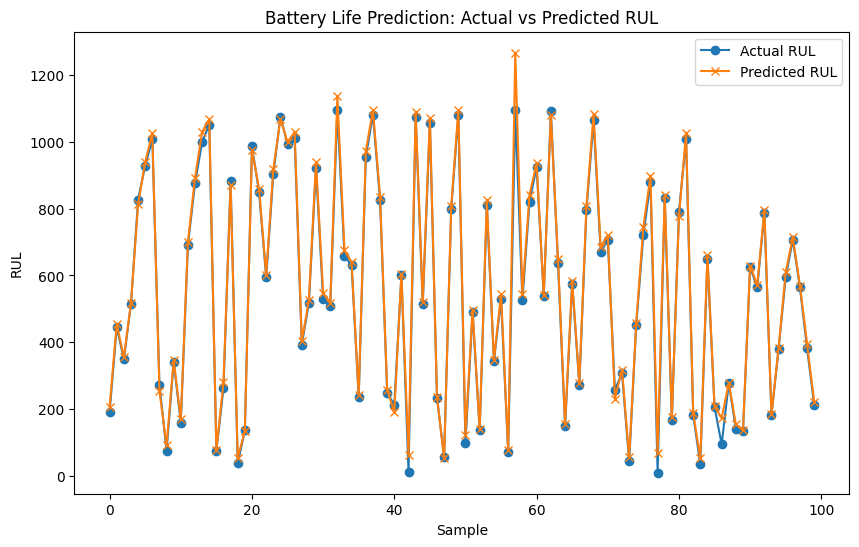

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test[:100], label='Actual RUL', marker='o')
plt.plot(y_pred[:100], label='Predicted RUL', marker='x')
plt.title('Battery Life Prediction: Actual vs Predicted RUL')
plt.xlabel('Sample')
plt.ylabel('RUL')
plt.legend()
plt.show()

In [6]:
#LSTM MODEL

In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.model_selection import train_test_split

# Load your dataset (adjust file path as needed)
data = pd.read_csv('dataset.csv')  # Replace with the actual path to your dataset

# Feature selection: Drop 'RUL' for input features
X = data.drop('RUL', axis=1).values
y = data['RUL'].values

# Normalize features (MinMax scaling between 0 and 1)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Reshape the data into time series format for LSTM (samples, timesteps, features)
TIME_STEPS = 10  # Window size

def create_sequences(X, y, time_steps=TIME_STEPS):
    X_seq, y_seq = [], []
    for i in range(len(X) - time_steps):
        X_seq.append(X[i:i + time_steps])
        y_seq.append(y[i + time_steps])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X, y)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Define the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(64, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model_lstm.add(Dense(32, activation='relu'))
model_lstm.add(Dense(1))  # Output layer for RUL prediction

# Compile the model
model_lstm.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model_lstm.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_mae = model_lstm.evaluate(X_test, y_test)
print(f'Test MAE: {test_mae:.4f}')

# Predict the RUL for the test data
y_pred = model_lstm.predict(X_test).flatten()


Epoch 1/50


C:\Users\saravanan013\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


302/302 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 375823.2812 - mae: 519.7313 - val_loss: 214299.3594 - val_mae: 378.1617
Epoch 2/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 179661.2969 - mae: 346.9475 - val_loss: 106198.4531 - val_mae: 278.0216
Epoch 3/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 106129.8203 - mae: 282.4610 - val_loss: 102520.3203 - val_mae: 274.4716
Epoch 4/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 103211.9609 - mae: 278.3556 - val_loss: 102496.3984 - val_mae: 274.4120
Epoch 5/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 103939.2734 - mae: 279.9975 - val_loss: 102519.3125 - val_mae: 274.4697
Epoch 6/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 104927.1016 - mae: 281.2375 - val_loss: 102495.4766 - val_mae: 274.4106
Epoch 7/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 105516.0078 - mae: 281.7881 - val_loss: 102687.9297 - val_mae: 274.7626
Epoch 8/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 103474.6172 - mae: 279.1761

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Predict the RUL for the test data


# Flatten the predictions and actual values
y_pred = y_pred.flatten()
y_test = y_test.flatten()

# Calculate standard performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error

# Define a custom accuracy metric (percentage of predictions within 10% tolerance of actual value)
tolerance = 0.10  # 10% tolerance
accurate_predictions = np.sum(np.abs(y_test - y_pred) <= tolerance * y_test)
accuracy = accurate_predictions / len(y_test) * 100

# Print all performance metrics
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'Accuracy (within 10% tolerance): {accuracy:.2f}%')

# Optional: Print the first 10 predictions vs actual values for inspection
print('\nSample Predictions vs Actual Values:')
for i in range(10):
    print(f'Actual: {y_test[i]:.2f}, Predicted: {y_pred[i]:.2f}')


Mean Squared Error (MSE): 86.6885
Mean Absolute Error (MAE): 5.8733
Root Mean Squared Error (RMSE): 9.3107
Accuracy (within 10% tolerance): 94.75%

Sample Predictions vs Actual Values:
Actual: 192.00, Predicted: 190.25
Actual: 445.00, Predicted: 448.21
Actual: 349.00, Predicted: 346.63
Actual: 515.00, Predicted: 508.96
Actual: 827.00, Predicted: 793.27
Actual: 929.00, Predicted: 922.45
Actual: 1008.00, Predicted: 1010.74
Actual: 273.00, Predicted: 247.96
Actual: 74.00, Predicted: 81.23
Actual: 341.00, Predicted: 337.48


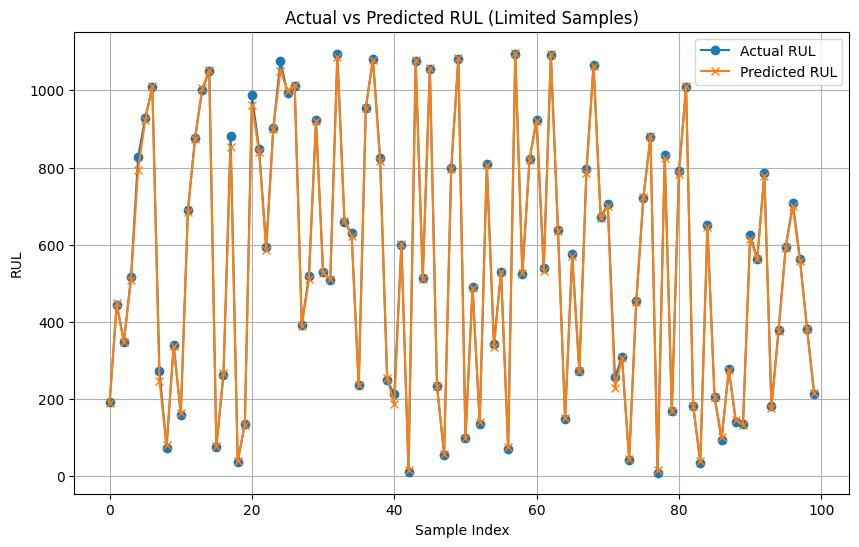

In [9]:
num_samples = 100
y_test_limited = y_test[:num_samples]
y_pred_limited = y_pred[:num_samples]

# Plot Actual vs. Predicted values for the limited data
plt.figure(figsize=(10, 6))
plt.plot(y_test_limited, label='Actual RUL', marker='o')
plt.plot(y_pred_limited, label='Predicted RUL', marker='x')
plt.title('Actual vs Predicted RUL (Limited Samples)')
plt.xlabel('Sample Index')
plt.ylabel('RUL')
plt.legend()
plt.grid(True)
plt.show()


In [10]:
#BI-LSTM

In [11]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load your dataset (adjust the file path as needed)
data = pd.read_csv('dataset.csv')  # Replace with your actual file path

# Feature selection: Drop 'RUL' for input features
X = data.drop('RUL', axis=1).values
y = data['RUL'].values

# Normalize features (MinMax scaling between 0 and 1)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Reshape the data into time series format for LSTM (samples, timesteps, features)
TIME_STEPS = 10  # Window size

def create_sequences(X, y, time_steps=TIME_STEPS):
    X_seq, y_seq = [], []
    for i in range(len(X) - time_steps):
        X_seq.append(X[i:i + time_steps])
        y_seq.append(y[i + time_steps])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X, y)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Define the Bidirectional LSTM model
model_bilstm = Sequential()
model_bilstm.add(Bidirectional(LSTM(64, activation='tanh', return_sequences=False), input_shape=(X_train.shape[1], X_train.shape[2])))
model_bilstm.add(Dense(32, activation='relu'))
model_bilstm.add(Dense(1))  # Output layer for RUL prediction

# Compile the model
model_bilstm.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model_bilstm.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_mae = model_bilstm.evaluate(X_test, y_test)
print(f'Test MAE: {test_mae:.4f}')

# Predict the RUL for the test data
y_pred = model_bilstm.predict(X_test).flatten()

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print performance metrics



Epoch 1/50


C:\Users\saravanan013\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


302/302 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 349049.4688 - mae: 498.2090 - val_loss: 128565.8828 - val_mae: 299.9378
Epoch 2/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 117671.9453 - mae: 292.6622 - val_loss: 102607.1797 - val_mae: 274.6320
Epoch 3/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 104602.2891 - mae: 280.9801 - val_loss: 102691.7969 - val_mae: 274.7680
Epoch 4/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 105509.3125 - mae: 281.7790 - val_loss: 102499.1172 - val_mae: 274.4225
Epoch 5/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 105734.5391 - mae: 282.7585 - val_loss: 101568.3203 - val_mae: 273.2596
Epoch 6/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 90014.0000 - mae: 254.2007 - val_loss: 6530.3892 - val_mae: 51.1715
Epoch 7/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4137.1265 - mae: 37.9524 - val_loss: 1324.5903 - val_mae: 26.7369
Epoch 8/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 826.6068 - mae: 19.1934 - val_loss: 8

In [65]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Predict the RUL for the test data
y_pred = model_bilstm.predict(X_test)

# Flatten the predictions and actual values
y_pred = y_pred.flatten()
y_test = y_test.flatten()

# Calculate standard performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error

# Define a custom accuracy metric (percentage of predictions within 10% tolerance of actual value)
tolerance = 0.10  # 10% tolerance
accurate_predictions = np.sum(np.abs(y_test - y_pred) <= tolerance * y_test)
accuracy = accurate_predictions / len(y_test) * 100

# Print all performance metrics
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'Accuracy (within 10% tolerance): {accuracy:.2f}%')

# Optional: Print the first 10 predictions vs actual values for inspection
print('\nSample Predictions vs Actual Values:')
for i in range(10):
    print(f'Actual: {y_test[i]:.2f}, Predicted: {y_pred[i]:.2f}')


95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Mean Squared Error (MSE): 51.5451
Mean Absolute Error (MAE): 3.6773
Root Mean Squared Error (RMSE): 6.3634
Accuracy (within 10% tolerance): 94.92%

Sample Predictions vs Actual Values:
Actual: 192.00, Predicted: 194.39
Actual: 445.00, Predicted: 453.20
Actual: 349.00, Predicted: 350.44
Actual: 515.00, Predicted: 514.15
Actual: 827.00, Predicted: 812.00
Actual: 929.00, Predicted: 928.30
Actual: 1008.00, Predicted: 1012.70
Actual: 273.00, Predicted: 246.04
Actual: 74.00, Predicted: 78.21
Actual: 341.00, Predicted: 342.07


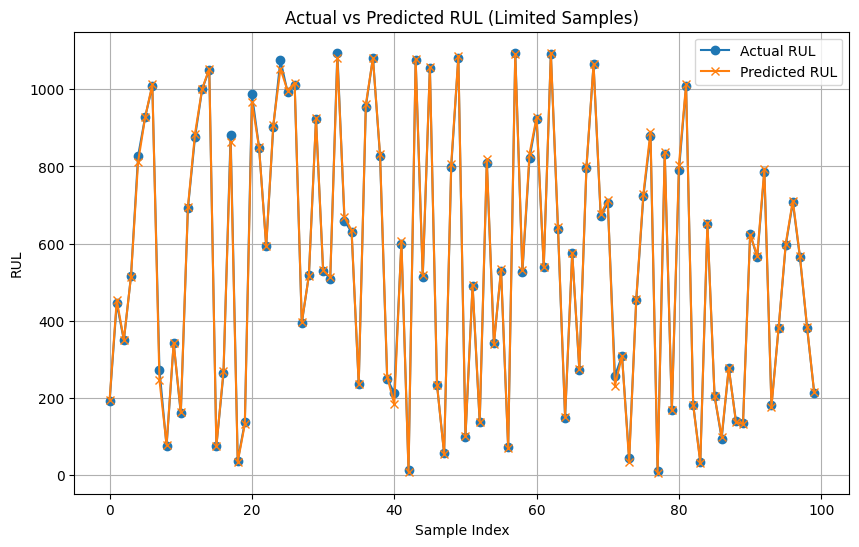

In [13]:
num_samples = 100
y_test_limited = y_test[:num_samples]
y_pred_limited = y_pred[:num_samples]

# Plot Actual vs. Predicted values for the limited data
plt.figure(figsize=(10, 6))
plt.plot(y_test_limited, label='Actual RUL', marker='o')
plt.plot(y_pred_limited, label='Predicted RUL', marker='x')
plt.title('Actual vs Predicted RUL (Limited Samples)')
plt.xlabel('Sample Index')
plt.ylabel('RUL')
plt.legend()
plt.grid(True)
plt.show()


In [14]:
# GRU MODEL

In [15]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load your dataset (adjust the file path as needed)
data = pd.read_csv('dataset.csv')  # Replace with your actual file path

# Feature selection: Drop 'RUL' for input features
X = data.drop('RUL', axis=1).values
y = data['RUL'].values

# Normalize features (MinMax scaling between 0 and 1)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Reshape the data into time series format for GRU (samples, timesteps, features)
TIME_STEPS = 10  # Window size

def create_sequences(X, y, time_steps=TIME_STEPS):
    X_seq, y_seq = [], []
    for i in range(len(X) - time_steps):
        X_seq.append(X[i:i + time_steps])
        y_seq.append(y[i + time_steps])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X, y)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Define the GRU model
model_gru = Sequential()
model_gru.add(GRU(64, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])))
model_gru.add(Dense(32, activation='relu'))
model_gru.add(Dense(1))  # Output layer for RUL prediction

# Compile the model
model_gru.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model_gru.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_mae = model_gru.evaluate(X_test, y_test)
print(f'Test MAE: {test_mae:.4f}')

# Predict the RUL for the test data
y_pred = model_gru.predict(X_test).flatten()

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print performance metrics



Epoch 1/50


C:\Users\saravanan013\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


302/302 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 359831.1250 - mae: 507.5712 - val_loss: 163473.0000 - val_mae: 332.1623
Epoch 2/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 135444.0000 - mae: 305.3834 - val_loss: 102528.9531 - val_mae: 274.3642
Epoch 3/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 103717.6953 - mae: 279.1661 - val_loss: 102666.0000 - val_mae: 274.7281
Epoch 4/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 103023.1562 - mae: 278.0029 - val_loss: 102176.8125 - val_mae: 273.9338
Epoch 5/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 77714.6641 - mae: 223.4389 - val_loss: 7007.6958 - val_mae: 50.9253
Epoch 6/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4494.4111 - mae: 37.6684 - val_loss: 1776.3975 - val_mae: 22.8341
Epoch 7/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1301.7961 - mae: 19.0662 - val_loss: 976.8730 - val_mae: 14.0239
Epoch 8/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 802.3689 - mae: 14.3544 - val_loss: 700.3507

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Predict the RUL for the test data
y_pred = model_gru.predict(X_test)

# Flatten the predictions and actual values
y_pred = y_pred.flatten()
y_test = y_test.flatten()

# Calculate standard performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error

# Define a custom accuracy metric (percentage of predictions within 10% tolerance of actual value)
tolerance = 0.10  # 10% tolerance
accurate_predictions = np.sum(np.abs(y_test - y_pred) <= tolerance * y_test)
accuracy = accurate_predictions / len(y_test) * 100

# Print all performance metrics
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'Accuracy (within 10% tolerance): {accuracy:.2f}%')

# Optional: Print the first 10 predictions vs actual values for inspection
print('\nSample Predictions vs Actual Values:')
for i in range(10):
    print(f'Actual: {y_test[i]:.2f}, Predicted: {y_pred[i]:.2f}')


95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Mean Squared Error (MSE): 201.2624
Mean Absolute Error (MAE): 10.9238
Root Mean Squared Error (RMSE): 14.1867
Accuracy (within 10% tolerance): 93.49%

Sample Predictions vs Actual Values:
Actual: 192.00, Predicted: 193.09
Actual: 445.00, Predicted: 456.07
Actual: 349.00, Predicted: 352.10
Actual: 515.00, Predicted: 515.84
Actual: 827.00, Predicted: 815.81
Actual: 929.00, Predicted: 944.47
Actual: 1008.00, Predicted: 1037.45
Actual: 273.00, Predicted: 248.48
Actual: 74.00, Predicted: 74.24
Actual: 341.00, Predicted: 342.99


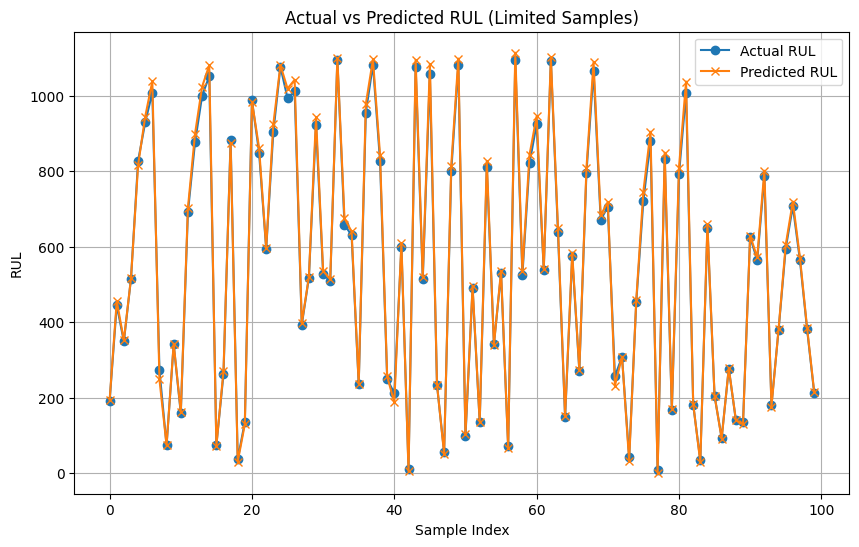

In [17]:
num_samples = 100
y_test_limited = y_test[:num_samples]
y_pred_limited = y_pred[:num_samples]

# Plot Actual vs. Predicted values for the limited data
plt.figure(figsize=(10, 6))
plt.plot(y_test_limited, label='Actual RUL', marker='o')
plt.plot(y_pred_limited, label='Predicted RUL', marker='x')
plt.title('Actual vs Predicted RUL (Limited Samples)')
plt.xlabel('Sample Index')
plt.ylabel('RUL')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
#BI GRU MODEL

In [19]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Bidirectional
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load your dataset (adjust the file path as needed)
data = pd.read_csv('dataset.csv')  # Replace with your actual file path

# Feature selection: Drop 'RUL' for input features
X = data.drop('RUL', axis=1).values
y = data['RUL'].values

# Normalize features (MinMax scaling between 0 and 1)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Reshape the data into time series format for BiGRU (samples, timesteps, features)
TIME_STEPS = 10  # Window size

def create_sequences(X, y, time_steps=TIME_STEPS):
    X_seq, y_seq = [], []
    for i in range(len(X) - time_steps):
        X_seq.append(X[i:i + time_steps])
        y_seq.append(y[i + time_steps])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X, y)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Define the BiGRU model
model_bigru = Sequential()
model_bigru.add(Bidirectional(GRU(64, activation='tanh', return_sequences=False), input_shape=(X_train.shape[1], X_train.shape[2])))
model_bigru.add(Dense(32, activation='relu'))
model_bigru.add(Dense(1))  # Output layer for RUL prediction

# Compile the model
model_bigru.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model_bigru.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_mae = model_bigru.evaluate(X_test, y_test)
print(f'Test MAE: {test_mae:.4f}')

# Predict the RUL for the test data
y_pred = model_bigru.predict(X_test).flatten()


Epoch 1/50


C:\Users\saravanan013\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


302/302 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 361019.2188 - mae: 510.0709 - val_loss: 169106.3125 - val_mae: 337.2393
Epoch 2/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 141048.6250 - mae: 311.6109 - val_loss: 102584.9531 - val_mae: 274.4115
Epoch 3/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 104453.1953 - mae: 280.9048 - val_loss: 102540.2109 - val_mae: 274.5141
Epoch 4/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 104559.8828 - mae: 280.6641 - val_loss: 102559.3984 - val_mae: 274.5505
Epoch 5/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 103918.3047 - mae: 279.3339 - val_loss: 98964.9375 - val_mae: 269.4484
Epoch 6/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 60551.0664 - mae: 187.7298 - val_loss: 3480.2480 - val_mae: 36.0801
Epoch 7/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2343.1118 - mae: 29.3713 - val_loss: 683.1484 - val_mae: 16.8294
Epoch 8/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 601.9521 - mae: 16.2062 - val_loss: 422

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Predict the RUL for the test data


# Flatten the predictions and actual values
y_pred = y_pred.flatten()
y_test = y_test.flatten()

# Calculate standard performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error

# Define a custom accuracy metric (percentage of predictions within 10% tolerance of actual value)
tolerance = 0.10  # 10% tolerance
accurate_predictions = np.sum(np.abs(y_test - y_pred) <= tolerance * y_test)
accuracy = accurate_predictions / len(y_test) * 100

# Print all performance metrics
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'Accuracy (within 10% tolerance): {accuracy:.2f}%')

# Optional: Print the first 10 predictions vs actual values for inspection
print('\nSample Predictions vs Actual Values:')
for i in range(10):
    print(f'Actual: {y_test[i]:.2f}, Predicted: {y_pred[i]:.2f}')


Mean Squared Error (MSE): 129.5436
Mean Absolute Error (MAE): 8.9368
Root Mean Squared Error (RMSE): 11.3817
Accuracy (within 10% tolerance): 91.90%

Sample Predictions vs Actual Values:
Actual: 192.00, Predicted: 188.81
Actual: 445.00, Predicted: 453.46
Actual: 349.00, Predicted: 351.63
Actual: 515.00, Predicted: 515.72
Actual: 827.00, Predicted: 816.51
Actual: 929.00, Predicted: 940.63
Actual: 1008.00, Predicted: 1028.91
Actual: 273.00, Predicted: 245.87
Actual: 74.00, Predicted: 70.62
Actual: 341.00, Predicted: 343.91


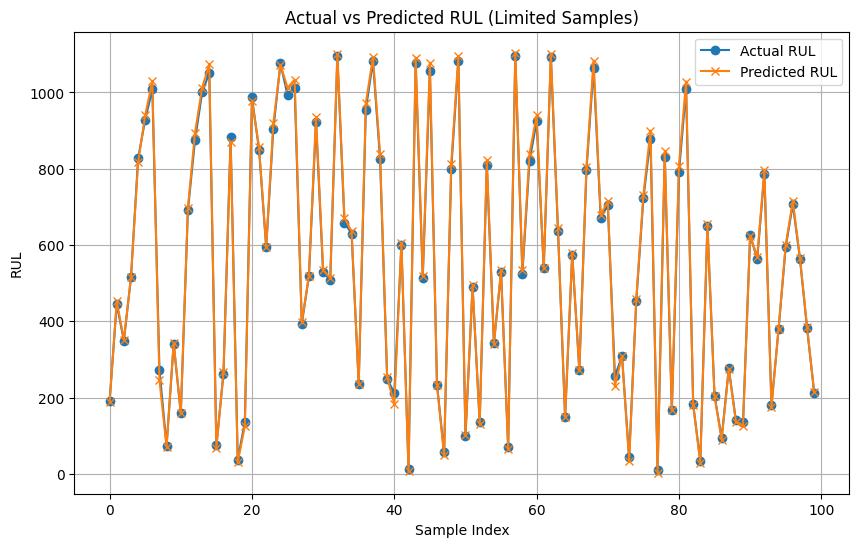

In [21]:
# Limit the data to the first 100 samples for plotting
num_samples = 100
y_test_limited = y_test[:num_samples]
y_pred_limited = y_pred[:num_samples]

# Plot Actual vs. Predicted values for the limited data
plt.figure(figsize=(10, 6))
plt.plot(y_test_limited, label='Actual RUL', marker='o')
plt.plot(y_pred_limited, label='Predicted RUL', marker='x')
plt.title('Actual vs Predicted RUL (Limited Samples)')
plt.xlabel('Sample Index')
plt.ylabel('RUL')
plt.legend()
plt.grid(True)
plt.show()


In [22]:
# Initialize a dictionary to store performance metrics for all models
performance_metrics = {}

# Function to update the metrics dictionary for each model
def update_metrics(model_name, mse, mae, rmse, accuracy):
    performance_metrics[model_name] = {
        "MSE": mse,
        "MAE": mae,
        "RMSE": rmse,
        "Accuracy": accuracy
    }

# Function to calculate and store performance metrics
def evaluate_and_store_metrics(model, model_name, X_test, y_test):
    # Predict the RUL for the test data
    y_pred = model.predict(X_test)

    # Flatten the predictions and actual values
    y_pred = y_pred.flatten()
    y_test = y_test.flatten()

    # Calculate standard performance metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # Root Mean Squared Error

    # Define a custom accuracy metric (percentage of predictions within 10% tolerance of actual value)
    tolerance = 0.10  # 10% tolerance
    accurate_predictions = np.sum(np.abs(y_test - y_pred) <= tolerance * y_test)
    accuracy = accurate_predictions / len(y_test) * 100

    # Add the metrics to the dictionary
    update_metrics(model_name, mse, mae, rmse, accuracy)

    # Print all performance metrics for the current model
    print(f'{model_name} Performance Metrics:')
    print(f'Mean Squared Error (MSE): {mse:.4f}')
    print(f'Mean Absolute Error (MAE): {mae:.4f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
    print(f'Accuracy (within 10% tolerance): {accuracy:.2f}%')

    # Optional: Print the first 10 predictions vs actual values for inspection
    print('\nSample Predictions vs Actual Values:')
    for i in range(10):
        print(f'Actual: {y_test[i]:.2f}, Predicted: {y_pred[i]:.2f}')


In [23]:
# Example of evaluating and storing metrics for each model

# Model 1: RNN
evaluate_and_store_metrics(model_rnn, "RNN", X_test, y_test)





95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
RNN Performance Metrics:
Mean Squared Error (MSE): 1816.3876
Mean Absolute Error (MAE): 15.0048
Root Mean Squared Error (RMSE): 42.6191
Accuracy (within 10% tolerance): 91.27%

Sample Predictions vs Actual Values:
Actual: 192.00, Predicted: 207.31
Actual: 445.00, Predicted: 454.37
Actual: 349.00, Predicted: 355.04
Actual: 515.00, Predicted: 516.89
Actual: 827.00, Predicted: 813.48
Actual: 929.00, Predicted: 940.20
Actual: 1008.00, Predicted: 1025.62
Actual: 273.00, Predicted: 253.64
Actual: 74.00, Predicted: 90.84
Actual: 341.00, Predicted: 346.20


In [24]:
evaluate_and_store_metrics(model_lstm, "LSTM", X_test, y_test)

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
LSTM Performance Metrics:
Mean Squared Error (MSE): 86.6885
Mean Absolute Error (MAE): 5.8733
Root Mean Squared Error (RMSE): 9.3107
Accuracy (within 10% tolerance): 94.75%

Sample Predictions vs Actual Values:
Actual: 192.00, Predicted: 190.25
Actual: 445.00, Predicted: 448.21
Actual: 349.00, Predicted: 346.63
Actual: 515.00, Predicted: 508.96
Actual: 827.00, Predicted: 793.27
Actual: 929.00, Predicted: 922.45
Actual: 1008.00, Predicted: 1010.74
Actual: 273.00, Predicted: 247.96
Actual: 74.00, Predicted: 81.23
Actual: 341.00, Predicted: 337.48


In [73]:
evaluate_and_store_metrics(model_bilstm, "BILSTM", X_test, y_test)

BiLSTM Performance Metrics:
Mean Squared Error (MSE): 51.5451
Mean Absolute Error (MAE): 3.6773
Root Mean Squared Error (RMSE): 6.3634
Accuracy (within 10% tolerance): 94.92%

Sample Predictions vs Actual Values:
Actual: 192.0, Predicted: 194.39
Actual: 445.0, Predicted: 453.2
Actual: 349.0, Predicted: 350.44
Actual: 515.0, Predicted: 514.15
Actual: 827.0, Predicted: 812.0
Actual: 929.0, Predicted: 928.3
Actual: 1008.0, Predicted: 1012.7
Actual: 273.0, Predicted: 246.04
Actual: 74.0, Predicted: 78.21
Actual: 341.0, Predicted: 342.07


In [26]:
evaluate_and_store_metrics(model_gru, "GRU", X_test, y_test)

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
GRU Performance Metrics:
Mean Squared Error (MSE): 201.2624
Mean Absolute Error (MAE): 10.9238
Root Mean Squared Error (RMSE): 14.1867
Accuracy (within 10% tolerance): 93.49%

Sample Predictions vs Actual Values:
Actual: 192.00, Predicted: 193.09
Actual: 445.00, Predicted: 456.07
Actual: 349.00, Predicted: 352.10
Actual: 515.00, Predicted: 515.84
Actual: 827.00, Predicted: 815.81
Actual: 929.00, Predicted: 944.47
Actual: 1008.00, Predicted: 1037.45
Actual: 273.00, Predicted: 248.48
Actual: 74.00, Predicted: 74.24
Actual: 341.00, Predicted: 342.99


In [27]:
evaluate_and_store_metrics(model_bigru, "BIGRU", X_test, y_test)

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
BIGRU Performance Metrics:
Mean Squared Error (MSE): 129.5436
Mean Absolute Error (MAE): 8.9368
Root Mean Squared Error (RMSE): 11.3817
Accuracy (within 10% tolerance): 91.90%

Sample Predictions vs Actual Values:
Actual: 192.00, Predicted: 188.81
Actual: 445.00, Predicted: 453.46
Actual: 349.00, Predicted: 351.63
Actual: 515.00, Predicted: 515.72
Actual: 827.00, Predicted: 816.51
Actual: 929.00, Predicted: 940.63
Actual: 1008.00, Predicted: 1028.91
Actual: 273.00, Predicted: 245.87
Actual: 74.00, Predicted: 70.62
Actual: 341.00, Predicted: 343.91


In [63]:
best_model_name = None
best_model_score = float('inf')  # We start by assuming the best score is infinity (to minimize)

# Compare models based on RMSE (you can adjust to compare based on another metric like MSE, etc.)
for model_name, metrics in performance_metrics.items():
    print(f"\nComparing {model_name}:")
    print(f"MSE: {metrics['MSE']:.4f}, MAE: {metrics['MAE']:.4f}, RMSE: {metrics['RMSE']:.4f}, Accuracy: {metrics['Accuracy']:.2f}%")
    
    # Example comparison based on RMSE (lower RMSE is better)
    if metrics['RMSE'] < best_model_score:
        best_model_score = metrics['RMSE']
        best_model_name = model_name

print(f"\nThe best model based on RMSE is: {best_model_name} with RMSE: {best_model_score:.4f}")


Comparing RNN:
MSE: 1816.3876, MAE: 15.0048, RMSE: 42.6191, Accuracy: 91.27%

Comparing LSTM:
MSE: 86.6885, MAE: 5.8733, RMSE: 9.3107, Accuracy: 94.75%

Comparing BILSTM:
MSE: 51.5451, MAE: 3.6773, RMSE: 6.3634, Accuracy:94.92%

Comparing GRU:
MSE: 201.2624, MAE: 10.9238, RMSE: 14.1867, Accuracy: 93.49%

Comparing BIGRU:
MSE: 129.5436, MAE: 8.9368, RMSE: 11.3817, Accuracy: 91.90%

The best model based on RMSE is: BILSTM with RMSE: 6.3634
